# Explore here

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [56]:
df.shape

(1338, 7)

In [57]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [62]:
df.drop(columns=['region'], inplace=True)

In [63]:
print (df['charges'].mean())

13270.422265141257


In [64]:
media_hijos = df[df['children'] >= 1]['children'].mean()
print(media_hijos)

1.9175392670157068


In [65]:
hombres = df[df['sex'] == 'male']
mujeres = df[df['sex'] == 'female']

print(hombres['charges'].mean())
print(mujeres['charges'].mean())



13956.751177721893
12569.578843835347


In [66]:
tabla_mujeres = mujeres.groupby('smoker')['charges'].mean()
print("Mujeres:")
print(tabla_mujeres)

tabla_hombres = hombres.groupby('smoker')['charges'].mean()
print("\nHombres:")
print(tabla_hombres)


Mujeres:
smoker
no      8762.297300
yes    30678.996276
Name: charges, dtype: float64

Hombres:
smoker
no      8087.204731
yes    33042.005975
Name: charges, dtype: float64


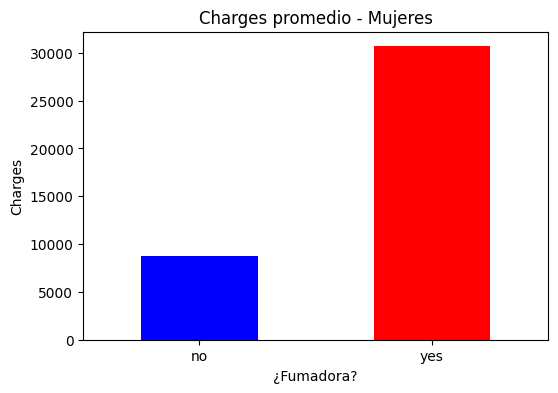

In [67]:
plt.figure(figsize=(6,4))
tabla_mujeres.plot(kind='bar', color=['blue', 'red'])
plt.title('Charges promedio - Mujeres')
plt.ylabel('Charges')
plt.xlabel('¿Fumadora?')
plt.xticks(rotation=0)
plt.show()

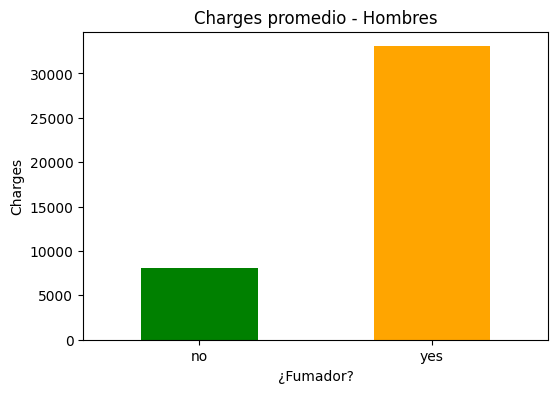

In [68]:
plt.figure(figsize=(6,4))
tabla_hombres.plot(kind='bar', color=['green', 'orange'])
plt.title('Charges promedio - Hombres')
plt.ylabel('Charges')
plt.xlabel('¿Fumador?')
plt.xticks(rotation=0)
plt.show()

In [69]:
modelo_mujeres = smf.ols('charges ~ smoker', data=mujeres).fit()
print(modelo_mujeres.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     831.7
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          5.65e-119
Time:                        20:31:43   Log-Likelihood:                -6837.0
No. Observations:                 662   AIC:                         1.368e+04
Df Residuals:                     660   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8762.2973    316.745     27.664

In [70]:
modelo_hombres = smf.ols('charges ~ smoker', data=hombres).fit()
print(modelo_hombres.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1349.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          5.32e-163
Time:                        20:31:43   Log-Likelihood:                -6989.3
No. Observations:                 676   AIC:                         1.398e+04
Df Residuals:                     674   BIC:                         1.399e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8087.2047    329.536     24.541

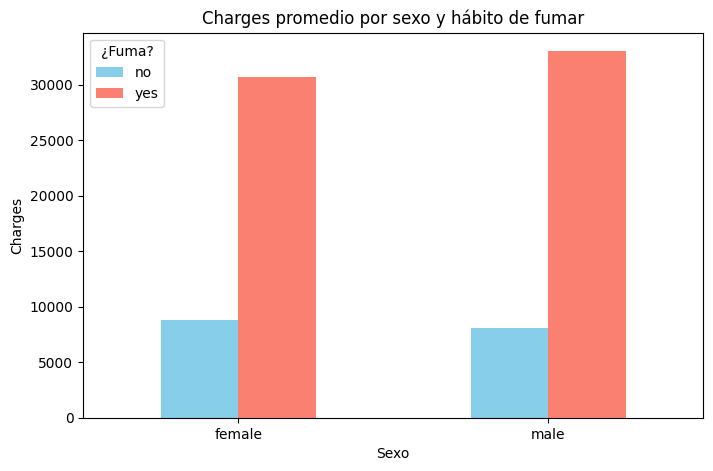

In [71]:
tabla = df.pivot_table(index='sex', columns='smoker', values='charges', aggfunc='mean')

# Graficar
tabla.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Charges promedio por sexo y hábito de fumar')
plt.ylabel('Charges')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(title='¿Fuma?')
plt.show()

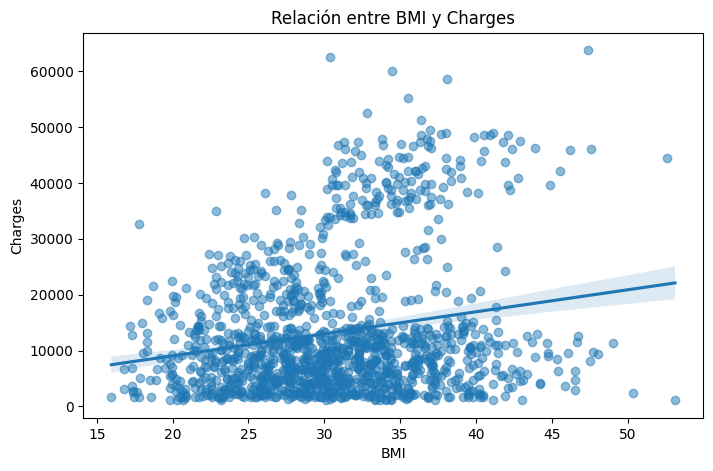

In [72]:
plt.figure(figsize=(8,5))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'alpha':0.5})
plt.title('Relación entre BMI y Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Fumar y tener un BMI alto son factors muy relevantes a la hora de calcular la prima de un seguro, suelen ser personas con mayor riesgo a la hora de contratar un seguro medico. Como podemos ver el efcto de fumar aumenta significativamente el costo en ambos gruoo stanto hombres como mujeres. 